# BUSINESS UNDERSTANDING


0ur goal is to explore the data and come up with key insights that be will the springboard for us to venture into this fast growing market by analyzing the funding data from 2018 to 2021, focusing on the key factors such as the amount of funding received, sectors, stage of investment, their geographical location and other promising opportunities. Our analysis is done usingthe CRISP-DM process.



# BUSINESS QUESTIONS

 1. Funding Trends:

How has the total funding amount changed year over year from 2018 to 2021?
 Which top 5 start-ups receives the most funding and reason why they get the most funds.?

2. Sector Analysis:

Which sectors have received the most funding, and how does the funding distribution vary across sectors?

3. Stage Analysis: 

What is the distribution of funding across different investment stages (e.g., Pre-seed, Seed, Series A)?

What is the trend of change in the average funding from the year 2018 t0 2021?



4. Geographical Analysis: 

Which City and region in the india ecosystem are investors likely to channel their funds and the factors that affect their decisions?


5.Investor Influence: 

Who are the top 10 investors in the indian ecosystem. What is their funding pattern and areas they will like to invest in?







# HYPOTHESIS TESTING


We use hypothesis testing to do a statistical test on the sampke to generate conclusions and inferences about the whole data. We develop a null and alternative hypothesis to focus on.

a) Null Hypothesis (Ho): There is no significant difference in the amount of the funding received by start-ups across different sectors and stages.

b) Alternate Hypothesis(H1): There is a significant difference in the amount of the funding received by start-ups across different sectors and stages.

# DATA UNDERSTANDING



Company_Brand: Name of the start-up

Founded: The year the start-up was founded.

HeadQuaters: City where the start-up is located

Sector: Domain industry of the start-up

Overview: A brief description of the start-up business

Founders: Names of the founders

Investors: Investors or investments firms that funded the start-up

Amount: The amount of funding received (in $USD)

Stage: Stage of investment(e.g Pre-seed, Seed, Series A e.t.c)



# DATA PREPARATION


Before we clean and analyze the data we install all relevant libraries we will need and connect to all the data sources.

In [1]:
%pip install pyodbc  
%pip install python-dotenv
%pip install squarify

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import squarify
import re
from datetime import datetime

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm




import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load environment variables from .env file into a dictionary

environment_variables=dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("database")
server = environment_variables.get("server")
username = environment_variables.get("username")
password = environment_variables.get("password")

connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [4]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection=pyodbc.connect(connection_string)

# Loading the all data sets (Start-up funding 2018-2021)

In [5]:
#Loading table 1 which is the 2020 datasets
# Now the sql query to get the data is what what you see below.
# Note that you will not have permissions to insert delete or update this database table.


query = "SELECT * FROM dbo.LP1_startup_funding2020"

data = pd.read_sql(query, connection)

In [6]:
#Loading table 2 which is the 2021 data sets 

query = "SELECT * FROM dbo.LP1_startup_funding2021"

data2= pd.read_sql(query, connection)

In [7]:
#Load the data from the source (2019)


data3 = pd.read_csv(r'C:\Users\COMPUFY\Downloads\startup_funding2019.csv')

In [8]:
#Load the data from the source (2018)


data4= pd.read_csv(r'C:\Users\COMPUFY\Downloads\startup_funding2018.csv')

# EXPLORING THE DATA ALL DATASETS (EDA)

A deep dive and observation to have an overview on the kind of dataset we are dealing with. (variables, data types, inconsistencies e.t.c)

In [9]:
# View the entire info of the dataset (2020)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [10]:
# View the upper part of the dataset (2020)

data.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [11]:
# View the latter part of the dataset (2020)

data.tail()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,None
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,None
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,None
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,None
1054,Pando,2017.0,Chennai,Logitech,Networked logistics management software,"Jayakrishnan, Abhijeet Manohar",Chiratae Ventures,9000000.0,Series A,None


In [12]:
#Show the shape of the dataset (2020)

data.shape

(1055, 10)

In [13]:
#Show the Summary Statistics for 2020

data.describe().T


,count,mean,std,min,25%,50%,75%,max
Founded,842.0,2.015363e+03,4.097909e+00,1973.0,2014.0,2016.0,2018.0,2.020000e+03
Amount,801.0,1.130430e+08,2.476635e+09,12700.0,1000000.0,3000000.0,11000000.0,7.000000e+10


Dataset 2021

In [14]:
# View the entire info of the dataset (2021)

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [15]:
# View the upper part of the dataset (2021)

data2.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [16]:
# View the latter part of the dataset (2021)

data2.tail()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B
1208,WeRize,2019.0,Bangalore,Financial Services,India’s first socially distributed full stack ...,"Vishal Chopra, Himanshu Gupta","3one4 Capital, Kalaari Capital",$8000000,Series A


In [17]:
#Show the shape of the dataset (2021)

data2.shape

(1209, 9)

In [18]:
#Show the Summary Statistics for 2021

data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Founded,1208.0,2016.655629,4.517364,1963.0,2015.0,2018.0,2020.0,2021.0


Dataset 2019

In [19]:
# View the entire info of the dataset (2021)

data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [20]:
# View the upper part of the dataset (2019)

data3.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [21]:
# View the lower part of the dataset (2019)

data3.tail()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN
88,Ess Kay Fincorp,NaN,Rajasthan,Banking,Organised Non-Banking Finance Company,Rajendra Setia,"TPG, Norwest Venture Partners, Evolvence India","$33,000,000",NaN


In [22]:
#Show the shape of the dataset (2019)

data3.shape

(89, 9)

In [23]:
#Show the Summary Statistics for 2019

data3.describe().T

,count,mean,std,min,25%,50%,75%,max
Founded,60.0,2014.533333,2.937003,2004.0,2013.0,2015.0,2016.25,2019.0


Dataset 2018

In [24]:
# View the entire info of the dataset (2018)

data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [25]:
# View the upper part of the dataset (2018)

data4.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [26]:
# View the lower part of the dataset (2018)

data4.tail()

,Company Name,Industry,Round/Series,Amount,Location,About Company
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...
525,Netmeds,"Biotechnology, Health Care, Pharmaceutical",Series C,35000000,"Chennai, Tamil Nadu, India",Welcome to India's most convenient pharmacy!


In [27]:
#Show the shape of the dataset (2018)

data4.shape

(526, 6)

In [28]:
#Show the Summary Statistics for 2018

data4.describe().T

,count,unique,top,freq
Company Name,526,525,TheCollegeFever,2
Industry,526,405,—,30
Round/Series,526,21,Seed,280
Amount,526,198,—,148
Location,526,50,"Bangalore, Karnataka, India",102
About Company,526,524,"TheCollegeFever is a hub for fun, fiesta and f...",2


In [29]:
#Rename columns of data4 to match combined_data

data4= data4.rename(columns={
    'Company Name': 'Company_Brand',
    'Industry': 'Sector',
    'Round/Series': 'Stage',
    'Amount': 'Amount',
    'Location': 'HeadQuarter',
    'About Company': 'What_it_does'
})

# Preprocessing the data to check the quality of all the dataset 2021-2018

#Display the data types on Start-up funding 2018-2021

In [30]:
# Dataset 2021

data.dtypes 

Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What_it_does      object
Founders          object
Investor          object
Amount           float64
Stage             object
column10          object
dtype: object

In [31]:
# Dataset 2020


data2.dtypes 

Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What_it_does      object
Founders          object
Investor          object
Amount            object
Stage             object
dtype: object

In [32]:
# Dataset 2019

data3.dtypes 

Company/Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount($)         object
Stage             object
dtype: object

In [33]:
# Dataset 2018

data4.dtypes 

Company_Brand    object
Sector           object
Stage            object
Amount           object
HeadQuarter      object
What_it_does     object
dtype: object

#Display the unique data types on Start-up funding 2021-2018


In [34]:
#Display 2021

data.nunique()

Company_Brand    905
Founded           26
HeadQuarter       77
Sector           302
What_it_does     990
Founders         927
Investor         848
Amount           300
Stage             42
column10           2
dtype: int64

In [35]:
#Display 2020

data2.nunique()

Company_Brand    1033
Founded            30
HeadQuarter        70
Sector            254
What_it_does     1143
Founders         1095
Investor          937
Amount            278
Stage              31
dtype: int64

In [36]:
#Display 2019

data3.nunique()

Company/Brand    87
Founded          12
HeadQuarter      17
Sector           52
What it does     88
Founders         85
Investor         86
Amount($)        50
Stage            15
dtype: int64

In [37]:
#Display 2018

data4.nunique()

Company_Brand    525
Sector           405
Stage             21
Amount           198
HeadQuarter       50
What_it_does     524
dtype: int64

In [38]:
# Standardize column names in each DataFrame

data4.rename(columns={
    'Company/Brand': 'Company_Brand',
    'What it does': 'What_it_does',
    'Amount($)': 'Amount'
}, inplace=True)
 
data3.rename(columns={
    'Company/Brand': 'Company_Brand',
    'What it does': 'What_it_does',
    'Amount($)': 'Amount'
}, inplace=True)
 
data.rename(columns={
    'Company/Brand': 'Company_Brand',
    'What it does': 'What_it_does',
    'Amount($)': 'Amount'
}, inplace=True)
 
data2.rename(columns={
    'Company/Brand': 'Company_Brand',
    'What it does': 'What_it_does',
    'Amount($)': 'Amount'
}, inplace=True)

In [39]:
# Add the 'Year' column

data4['Year'] = 2018
data3['Year'] = 2019
data['Year']  = 2020
data2['Year'] = 2021

# CONCATENATING DATASETS

In [40]:
# Combine all datasets

df_combined = pd.concat([data, data2, data3, data4], ignore_index=True)

In [41]:
# Convert the 'Year' column to datetime format (handling NaNs appropriately)

df_combined['Year'] = pd.to_datetime(df_combined['Year'], format='%Y', errors='coerce')

In [42]:
#Extract the Year

df_combined['Year'] = df_combined['Year'].dt.year


In [43]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2879 non-null   object 
 1   Founded        2110 non-null   float64
 2   HeadQuarter    2765 non-null   object 
 3   Sector         2861 non-null   object 
 4   What_it_does   2879 non-null   object 
 5   Founders       2334 non-null   object 
 6   Investor       2253 non-null   object 
 7   Amount         2622 non-null   object 
 8   Stage          1941 non-null   object 
 9   column10       2 non-null      object 
 10  Year           2879 non-null   int32  
dtypes: float64(1), int32(1), object(9)
memory usage: 236.3+ KB


In [44]:
df_combined.describe().T

,count,mean,std,min,25%,50%,75%,max
Founded,2110.0,2016.079621,4.368006,1963.0,2015.0,2017.0,2019.0,2021.0
Year,2879.0,2020.023619,1.086974,2018.0,2020.0,2020.0,2021.0,2021.0


In [45]:
df_combined.dtypes


Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What_it_does      object
Founders          object
Investor          object
Amount            object
Stage             object
column10          object
Year               int32
dtype: object

In [46]:
df_combined.nunique()

Company_Brand    2214
Founded            34
HeadQuarter       172
Sector            873
What_it_does     2691
Founders         1980
Investor         1777
Amount            774
Stage              75
column10            2
Year                4
dtype: int64

In [47]:
df_combined.shape

(2879, 11)

In [48]:
df_combined.duplicated().sum()

23

# CLEANING ALL THE DATASETS 2021-2018

In [49]:
# Renaming columns to standardize names

df_combined.rename(columns={
    'Company/Brand': 'Company_Brand',
    'What it does': 'What_it_does',
    'Amount($)': 'Amount'
},inplace=True)

In [50]:
# Check for duplicated columns

df_combined.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False])

In [51]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2879 non-null   object 
 1   Founded        2110 non-null   float64
 2   HeadQuarter    2765 non-null   object 
 3   Sector         2861 non-null   object 
 4   What_it_does   2879 non-null   object 
 5   Founders       2334 non-null   object 
 6   Investor       2253 non-null   object 
 7   Amount         2622 non-null   object 
 8   Stage          1941 non-null   object 
 9   column10       2 non-null      object 
 10  Year           2879 non-null   int32  
dtypes: float64(1), int32(1), object(9)
memory usage: 236.3+ KB


# COLUMN BY COLUMN CLEANING

In [52]:
df_combined['Amount'].unique()

array([200000.0, 100000.0, nan, 400000.0, 340000.0, 600000.0, 45000000.0,
       1000000.0, 2000000.0, 1200000.0, 660000000.0, 120000.0, 7500000.0,
       5000000.0, 500000.0, 3000000.0, 10000000.0, 145000000.0,
       100000000.0, 21000000.0, 4000000.0, 20000000.0, 560000.0, 275000.0,
       4500000.0, 15000000.0, 390000000.0, 7000000.0, 5100000.0,
       700000000.0, 2300000.0, 700000.0, 19000000.0, 9000000.0,
       40000000.0, 750000.0, 1500000.0, 7800000.0, 50000000.0, 80000000.0,
       30000000.0, 1700000.0, 2500000.0, 40000.0, 33000000.0, 35000000.0,
       300000.0, 25000000.0, 3500000.0, 200000000.0, 6000000.0, 1300000.0,
       4100000.0, 575000.0, 800000.0, 28000000.0, 18000000.0, 3200000.0,
       900000.0, 250000.0, 4700000.0, 75000000.0, 8000000.0, 121000000.0,
       55000000.0, 3300000.0, 11000000.0, 16000000.0, 5400000.0,
       150000000.0, 4200000.0, 22000000.0, 52000000.0, 1100000.0,
       118000000.0, 1600000.0, 18500000.0, 70000000000.0, 800000000.0,
       4000

In [53]:
# Define the cleaning function

def clean_amount(amount):
    if pd.isna(amount) or amount in ['Undisclosed', '$Undisclosed', 'Upsparks']:
        return np.nan
    if isinstance(amount, str):
        amount = amount.replace(',', '').replace('$', '').replace('₹', '')
    try:
        amount = float(amount)
    except ValueError:
        return np.nan
    return amount


In [54]:
# Apply the cleaning function to the 'Amount' column

df_combined['Amount'] = df_combined['Amount'].apply(clean_amount)

In [55]:
# Create a temporary column to identify the currency type

df_combined['Currency'] = df_combined['Amount'].apply(lambda x: 'INR' if '₹' in str(x) else 'USD')

In [56]:
# Function to convert all amounts to USD

def convert_currency(amount, currency):
    if currency == 'INR':
        return amount * 0.013  # Assuming an exchange rate of 1 INR = 0.013 USD
    return amount

In [57]:
# Convert all amounts to USD

df_combined['Amount'] = df_combined.apply(lambda row: convert_currency(row['Amount'], row['Currency']), axis=1)



In [58]:
# Drop the temporary 'Currency' column

df_combined.drop(columns=['Currency'], inplace=True)


In [59]:
# Convert the cleaned 'Amount' column to numeric, forcing errors to NaN

df_combined['Amount'] = pd.to_numeric(df_combined['Amount'], errors='coerce')


In [60]:
# Check for missing values before filling

missing_values_before = df_combined['Amount'].isnull().sum()
print(f"Missing values in 'Amount' column before filling: {missing_values_before}")


Missing values in 'Amount' column before filling: 567


In [61]:
# Fill remaining missing values in 'Amount' column with the median value

df_combined['Amount'].fillna(df_combined['Amount'].median(), inplace=True)

In [62]:
# Check for missing values after filling

missing_values_after = df_combined['Amount'].isnull().sum()
print(f"Missing values in 'Amount' column after filling: {missing_values_after}")

Missing values in 'Amount' column after filling: 0


In [63]:
# Check the cleaned DataFrame

df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2879 non-null   object 
 1   Founded        2110 non-null   float64
 2   HeadQuarter    2765 non-null   object 
 3   Sector         2861 non-null   object 
 4   What_it_does   2879 non-null   object 
 5   Founders       2334 non-null   object 
 6   Investor       2253 non-null   object 
 7   Amount         2879 non-null   float64
 8   Stage          1941 non-null   object 
 9   column10       2 non-null      object 
 10  Year           2879 non-null   int32  
dtypes: float64(2), int32(1), object(8)
memory usage: 236.3+ KB


FOUNDED

In [64]:
df_combined['Founded'].unique()

array([2019., 2018., 2020., 2016., 2008., 2015., 2017., 2014., 1998.,
       2007., 2011., 1982., 2013., 2009., 2012., 1995., 2010., 2006.,
       1978.,   nan, 1999., 1994., 2005., 1973., 2002., 2004., 2001.,
       2021., 1993., 1989., 2000., 2003., 1991., 1984., 1963.])

In [65]:
# Check unique values to ensure conversion

df_combined['Founded'].unique()

array([2019., 2018., 2020., 2016., 2008., 2015., 2017., 2014., 1998.,
       2007., 2011., 1982., 2013., 2009., 2012., 1995., 2010., 2006.,
       1978.,   nan, 1999., 1994., 2005., 1973., 2002., 2004., 2001.,
       2021., 1993., 1989., 2000., 2003., 1991., 1984., 1963.])

In [66]:
# Handle missing values by filling with the forward fill
 
# Fill missing values with the forward fill
df_combined['Founded'] = df_combined['Founded'].fillna(method='ffill')

In [67]:
# If the first value is still NaN, use backward fill for the first value

df_combined['Founded'] = df_combined['Founded'].fillna(method='bfill')

In [68]:
# Check the DataFrame info to ensure proper conversion and filling

df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2879 non-null   object 
 1   Founded        2879 non-null   float64
 2   HeadQuarter    2765 non-null   object 
 3   Sector         2861 non-null   object 
 4   What_it_does   2879 non-null   object 
 5   Founders       2334 non-null   object 
 6   Investor       2253 non-null   object 
 7   Amount         2879 non-null   float64
 8   Stage          1941 non-null   object 
 9   column10       2 non-null      object 
 10  Year           2879 non-null   int32  
dtypes: float64(2), int32(1), object(8)
memory usage: 236.3+ KB


HEADQUARTERS

In [69]:
df_combined['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', None,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',


In [70]:
# Replace anomalies and correct known errors

df_combined['HeadQuarter'] = df_combined['HeadQuarter'].replace({
    '\t#REF!': '',
    'Pharmaceuticals\t#REF!': 'Pharmaceuticals',
    'Gurugram\t#REF!': 'Gurugram',
    'Telugana': 'Telangana',
    'Orissia': 'Odisha',
    'Small Towns, Andhra Pradesh': 'Andhra Pradesh',
    'Bangalore': 'Bengaluru',
    'Gurgaon': 'Gurugram',
    'Pune, Maharashtra, India': 'Pune',
    'Hyderabad, Andhra Pradesh, India': 'Hyderabad',
    'Bangalore, Karnataka, India': 'Bengaluru',
    'Mumbai, Maharashtra, India': 'Mumbai',
    'Noida, Uttar Pradesh, India': 'Noida',
    'Chennai, Tamil Nadu, India': 'Chennai',
    'New Delhi, Delhi, India': 'New Delhi',
    'Delhi, Delhi, India': 'Delhi',
    'Haryana, Haryana, India': 'Haryana',
    'Cochin, Kerala, India': 'Cochin',
    'Jaipur, Rajasthan, India': 'Jaipur',
    'Kolkata, West Bengal, India': 'Kolkata',
    'Powai, Assam, India': 'Powai',
    'Ghaziabad, Uttar Pradesh, India': 'Ghaziabad',
    'Mylapore, Tamil Nadu, India': 'Mylapore',
    'Lucknow, Uttar Pradesh, India': 'Lucknow'
})

In [71]:
# Step 2: Remove anomalies and whitespace

df_combined['HeadQuarter'] = df_combined['HeadQuarter'].str.replace(r'\t#REF!', '', regex=True).str.strip()


In [72]:
# Step 3: Standardize city and state/country names
# Create a mapping dictionary for standardizing names

standard_city_names = {
    'Mumbai': 'Mumbai',
    'Bengaluru': 'Bengaluru',
    'Hyderabad': 'Hyderabad',
    'Chennai': 'Chennai',
    'Pune': 'Pune',
    'Noida': 'Noida',
    'New Delhi': 'New Delhi',
    'Delhi': 'Delhi',
    'Gurugram': 'Gurugram',
    'Gurgaon': 'Gurugram',
    'Kolkata': 'Kolkata',
    'Rajasthan': 'Rajasthan',  
    'Odisha': 'Odisha',  
    'Goa': 'Goa',  
    'Gujarat': 'Gujarat',  
    'West Bengal': 'West Bengal',  
    'Jharkhand': 'Jharkhand',  
    'Uttar Pradesh': 'Uttar Pradesh',  
    'Haryana': 'Haryana',  
    'Madhya Pradesh': 'Madhya Pradesh',  
    'Kerala': 'Kerala',  
    'Punjab': 'Punjab',  
    'Andhra Pradesh': 'Andhra Pradesh'
}

In [73]:
# Apply the standardization

df_combined['HeadQuarter'] = df_combined['HeadQuarter'].replace(standard_city_names)

In [74]:
# Step 4: Handle missing values
# For this example, let's fill missing values with 'Unknown'

df_combined['HeadQuarter'].fillna('Unknown', inplace=True)

In [75]:
# Check the cleaned HeadQuarter column

print(df_combined['HeadQuarter'].unique())


['Chennai' 'Bengaluru' 'Pune' 'New Delhi' 'Indore' 'Hyderabad' 'Gurugram'
 'Belgaum' 'Noida' 'Mumbai' 'Andheri' 'Jaipur' 'Ahmedabad' 'Kolkata'
 'Tirunelveli, Tamilnadu' 'Thane' 'Unknown' 'Singapore' 'Gujarat'
 'Haryana' 'Kerala' 'Jodhpur' 'Jaipur, Rajastan' 'Delhi'
 'Frisco, Texas, United States' 'California' 'Dhingsara, Haryana'
 'New York, United States' 'Patna'
 'San Francisco, California, United States' 'San Francisco, United States'
 'San Ramon, California' 'Paris, Ile-de-France, France'
 'Plano, Texas, United States' 'Sydney'
 'San Francisco Bay Area, Silicon Valley, West Coast' 'Bangaldesh'
 'London, England, United Kingdom' 'Sydney, New South Wales, Australia'
 'Milano, Lombardia, Italy' 'Palmwoods, Queensland, Australia' 'France'
 'San Francisco Bay Area, West Coast, Western US'
 'Trivandrum, Kerala, India' 'Cochin' 'Samastipur, Bihar'
 'Irvine, California, United States' 'Tumkur, Karnataka'
 'Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom'
 'Shanghai, China' 'Jiaxin

In [76]:
# Ensure proper conversion and filling

df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2879 non-null   object 
 1   Founded        2879 non-null   float64
 2   HeadQuarter    2879 non-null   object 
 3   Sector         2861 non-null   object 
 4   What_it_does   2879 non-null   object 
 5   Founders       2334 non-null   object 
 6   Investor       2253 non-null   object 
 7   Amount         2879 non-null   float64
 8   Stage          1941 non-null   object 
 9   column10       2 non-null      object 
 10  Year           2879 non-null   int32  
dtypes: float64(2), int32(1), object(8)
memory usage: 236.3+ KB


SECTOR

In [77]:
df_combined['Sector'].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

In [78]:
def sector_redistribution(Sector):
    # Check if the sector is a float or NaN
    if isinstance(Sector, float) and not np.isnan(Sector):
        # Convert float to string
        return str(int(Sector))  # Convert float to integer and then to string
    elif pd.isnull(Sector):
        # Handle NaN values, you can return a default value or handle as needed
        return 'Unknown'
    else:
        # Sector is already a string, return it as is
        return Sector

In [79]:
def Sector_redistribution(Sector):
    if isinstance(Sector, str):
        if re.search(r'bank|fintech|finance|crypto|account|credit|venture|crowd|blockchain', Sector, re.IGNORECASE):
            return 'Finance'
        elif re.search(r'automotive|air transport|transport|logistics|vehicle|transportation', Sector, re.IGNORECASE):
            return 'Transport'
        else:
            return Sector
    else:
        return Sector


In [80]:
# Apply the function to the 'Sector' column
df_combined['Sector'] = df_combined['Sector'].apply(Sector_redistribution)

In [81]:
df_combined['Sector'].fillna('Unknown', inplace=True)

FOUNDERS

In [82]:
df_combined['Founders'].unique()

array(['Prasanna Manogaran, Bharani C L',
       'Saurabh Dixit, Gurudutt Upadhyay', 'Ajinkya Dhariya', ...,
       'Pavan Kushwaha', 'Jeevan Chowdary M, Harshit Harchani',
       'Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mohit Gupta'],
      dtype=object)

In [83]:
# Analyzing the most frequent founders' names

founders_frequency = df_combined['Founders'].value_counts()
founders_frequency.head(20)  # Displaying top 20 most frequent founders' names

Founders
Byju Raveendran                                              7
Ashneer Grover, Shashvat Nakrani                             7
Byju Raveendran, Divya Gokulnath                             6
Falguni Nayar                                                6
Sai Srinivas Kiran G, Shubham Malhotra                       5
Ritesh Agarwal                                               5
Bhavish Aggarwal                                             5
Gaurav Hinduja, Sashank Rishyasringa                         4
Sarvesh Shashi                                               4
Virendra Gupta                                               4
Kunal Shah                                                   4
Ajith Mohan Karimpana                                        4
Saurabh Saxena, Pulkit Jain, Anand Prakash, Vamsi Krishna    4
Sreevathsa Prabhakar                                         4
Utham Gowda                                                  4
Nikhil Bohra                                  

In [84]:
# Step 1: Replace anomalies with NaN

def clean_founders(founders):
    if isinstance(founders, str) and re.search(r'^\s*\.+\s*$|^\s*$|unknown|nan', founders, re.IGNORECASE):
        return np.nan
    return founders

df_combined['Founders'] = df_combined['Founders'].apply(clean_founders)



In [85]:
# Check the remaining missing values

missing_founders_count = df_combined['Founders'].isna().sum()
f"Remaining missing values in 'Founders' column: {missing_founders_count}"

"Remaining missing values in 'Founders' column: 712"

In [86]:
# Step 2: Use the most frequent names to fill missing values

most_frequent_founders = [
    "Ashneer Grover, Shashvat Nakrani",
    "Byju Raveendran, Divya Gokulnath",
    "Ritesh Agarwal",
    "Bhavish Aggarwal",
    "Nirmit Parikh",
    "Prabhkiran Singh",
    "Ankur Gupta",
    "Utham Gowda",
    "Kunal Shah",
    "Ashish Singhal, Govind Soni, Vimal Sagar Tiwari",
    "Kshama Fernandes",
    "Saurav Kumar",
    "Saurabh Saxena",
    "Nitish Mittersain",
    "Sankar Bora, Sourjyendu Medda, Vineet Rao",
    "Kajal Ilmi",
    "Sai Srinivas Kiran G, Shubham Malhotra",
    "Aman Gupta, Sameer Mehta",
    "Vineet Khanna, Varun Sadana, Aman Tekriwal",
    "Sahil Barua"
]

In [87]:
# Function to fill missing values

def fill_missing_founders_with_patterns(founders):
    if pd.isna(founders):
        return np.random.choice(most_frequent_founders)
    return founders

df_combined['Founders'] = df_combined['Founders'].apply(fill_missing_founders_with_patterns)

In [88]:
# Step 3: Verify if there are any remaining missing values

remaining_missing_values = df_combined['Founders'].isna().sum()
f"Remaining missing values in 'Founders' column after imputation: {remaining_missing_values}"

"Remaining missing values in 'Founders' column after imputation: 0"

INVESTORS

In [89]:
df_combined['Investor'].unique()

array(['Angel investors', 'GSF Accelerator', 'Venture Center', ...,
       'Norwest Venture Partners, General Catalyst, Fundamentum, Accel Partners',
       'TPG, Norwest Venture Partners, Evolvence India', nan],
      dtype=object)

In [90]:
# Analyzing the most frequent founders' names

Investor_frequency = df_combined['Investor'].value_counts()
Investor_frequency.head(20)  # Displaying top 20 most frequent Investor' names

Investor
Inflection Point Ventures    36
Venture Catalysts            32
Mumbai Angels Network        17
Angel investors              15
Undisclosed                  13
Tiger Global                 12
Titan Capital                11
Unicorn India Ventures       10
Sequoia Capital India         9
Alteria Capital               9
Better Capital                9
Trifecta Capital              8
Y Combinator                  7
Elevation Capital             7
9Unicorns                     7
Kalaari Capital               6
Sixth Sense Ventures          6
Chiratae Ventures             6
Sequoia India                 6
Anicut Angel Fund             6
Name: count, dtype: int64

In [91]:
# Step 1: Clean the 'Investor' column by replacing anomalies and NaN values

def clean_investor(investor):
    if isinstance(investor, str) and re.search(r'^\s*\.+\s*$|^\s*$|unknown|nan', investor, re.IGNORECASE):
        return np.nan
    return investor

df_combined['Investor'] = df_combined['Investor'].apply(clean_investor)

In [92]:
# List of top 20 most frequent investors

top_investors = [
    'Inflection Point Ventures', 'Venture Catalysts', 'Tiger Global', 'Elevation Capital',
    'Titan Capital', 'We Founder Circle', 'Sixth Sense Ventures', 'Sequoia Capital India',
    'Kalaari Capital', 'Anicut Angel Fund', 'Alteria Capital', 'Mumbai Angels Network',
    'SucSEED Indovation Fund', 'Venture Catalysts, 9Unicorns Accelerator Fund', '9Unicorns',
    'Better Capital', 'Unicorn India Ventures', 'Blue Ashva Capital', 'Y Combinator', 'Sequoia Capital'
]

In [93]:
# Function to fill missing values with top 20 most frequent investors

def fill_missing_investors(investor):
    if pd.isna(investor):
        return np.random.choice(top_investors)
    return investor

# Apply the fill_missing_investors function to fill missing values
df_combined['Investor'] = df_combined['Investor'].apply(fill_missing_investors)

STAGE

In [94]:
df_combined['Stage'].unique()

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding', '$1200000', 'Seed+',
       'Series F2', 'Series A+', 'Series G', 'Series B3', 'PE',
       'Series F1', 'Pre-series A1', '$300000', 'Early seed', '$6000000',
       '$1000000', 'Seies A', 'Series A2', 'Series I', nan,
       'Fresh funding', 'Post series A', 'Seed fund', 'Series B+',
       'Angel', 'Private Equity', 'Vent

In [95]:
Stage_unique = {
'Stage': [
        np.nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A', 'Series A', 'Series G', 'Series B',
        'Post series A', 'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+', 'Seed round',
        'Pre-series A', None, 'Seed', 'Pre-seed', 'Pre-series B', 'Debt', '$1200000', 'Bridge', 'Seed+', 'Series F2',
        'Series A+', 'Series H', 'Series B3', 'PE', 'Series F1', 'Pre-series A1', '$300000', 'Early seed', 'Series D1',
        '$6000000', '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I', 'Angel', 'Pre-Seed', 'Private Equity',
        'Venture - Series Unknown', 'Grant', 'Debt Financing', 'Post-IPO Debt', 'Corporate Round', 'Undisclosed',
        'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
        'Secondary Market', 'Post-IPO Equity', 'Non-equity Assistance', 'Funding Round'
    ]
}

In [96]:
# List of legitimate stages

legitimate_stages = [
    'Series A', 'Series B', 'Series C', 'Series D', 'Series E', 'Series F', 'Series G', 'Series H', 'Series I',
    'Seed', 'Pre-Seed', 'Seed Funding', 'Early Seed', 'Seed Round', 'Series A+', 'Series B+', 'Series D1',
    'Fresh Funding', 'Bridge', 'Private Equity', 'Debt Financing', 'Venture - Series Unknown'
]

In [97]:
# Function to clean and replace stages

def clean_and_replace_stages(stage):
    if pd.isna(stage) or stage not in legitimate_stages:
        return np.random.choice(legitimate_stages)
    return stage


In [98]:
stage_mapping = {
    'Series A': 'Series A', 'Series A+': 'Series A', 'Series A2': 'Series A', 'Seies A': 'Series A',
    'Series B': 'Series B', 'Series B+': 'Series B', 'Series B3': 'Series B',
    'Series C': 'Series C',
    'Series D': 'Series D', 'Series D1': 'Series D',
    'Series E': 'Series E',
    'Series F': 'Series F', 'Series F1': 'Series F', 'Series F2': 'Series F',
    'Series G': 'Series G',
    'Series H': 'Series H',
    'Series I': 'Series I',
    'Seed': 'Seed', 'Seed funding': 'Seed', 'Seed fund': 'Seed', 'Seed round': 'Seed', 'Early seed': 'Seed', 'Seed+': 'Seed',
    'Pre-seed': 'Pre-seed', 'Pre-Seed': 'Pre-seed',
    'Pre series A': 'Pre-series A', 'Pre-series A': 'Pre-series A', 'Pre-series A1': 'Pre-series A',
    'Pre-series B': 'Pre-series B',
    'Fresh funding': 'Undisclosed', 'Debt': 'Debt', 'Debt Financing': 'Debt', 'Post-IPO Debt': 'Debt',
    'PE': 'Private Equity', 'Private Equity': 'Private Equity', 'Bridge': 'Bridge', 'Grant': 'Grant',
    'Post-IPO Equity': 'Post-IPO Equity', 'Secondary Market': 'Secondary Market',
    'Non-equity Assistance': 'Non-equity Assistance', 'Corporate Round': 'Corporate Round', 'Venture - Series Unknown': 'Venture - Series Unknown',
    'Funding Round': 'Funding Round', 'Undisclosed': 'Undisclosed'
}

In [99]:
# Apply the clean_and_replace_stages function to clean and replace missing values

df_combined['Stage'] = df_combined['Stage'].apply(clean_and_replace_stages)

In [100]:
# Drop the column at index 10

df_combined.drop('column10', axis=1, inplace=True)

In [101]:
duplicate_rows = df_combined[df_combined.duplicated()]
duplicate_rows

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year
145,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,2020
1298,Trinkerr,2021.0,Bengaluru,Capital Markets,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,6600000.0,Series A,2021
1299,Zorro,2021.0,Gurugram,Social network,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",32000000.0,Seed,2021
1300,Ultraviolette,2021.0,Bengaluru,Transport,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",150000000.0,Series C,2021
1301,NephroPlus,2009.0,Hyderabad,Hospital & Health Care,A vision and passion of redefining healthcare ...,Vikram Vuppala,IIFL Asset Management,24000000.0,Series E,2021
1303,FanAnywhere,2021.0,Bengaluru,Financial Services,Celebrity NFT platform,"Varun Chaudhary, Amit Kumar","Oasis Capital, Scorpio VC, DeltaHub Capital",4000000.0,Seed,2021
1305,Spry,2021.0,Mumbai,Music,THE BEST ROYALTY-FREE MUSIC TO CREATE TRENDING...,"Gaurav Dagaonkar, Meghna Mittal","9Unicorns, Ashneer Grover",1500000.0,Seed,2021
1310,MasterChow,2020.0,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,461000.0,Seed,2021


# HYPOTHESIS TESTING
Testing the hypothesis using Anova



In [102]:
# Create the model

model = ols('Amount ~ C(Sector) + C(Stage)', data=df_combined).fit()


In [103]:
# Perform the ANOVA

anova_results = sm.stats.anova_lm(model, typ=2)



In [104]:
# Display the results

print(anova_results)


                 sum_sq      df         F    PR(>F)
C(Sector)  5.511437e+20   761.0  0.055601  1.000000
C(Stage)   3.306223e+20    21.0  1.208686  0.232569
Residual   2.730175e+22  2096.0       NaN       NaN


In [105]:
# Interpretation

p_value_sector = anova_results['PR(>F)']['C(Sector)']
p_value_stage = anova_results['PR(>F)']['C(Stage)']


In [106]:
print(f"P-value for Sector: {p_value_sector}")
print(f"P-value for Stage: {p_value_stage}")



P-value for Sector: 0.9999999999999999
P-value for Stage: 0.23256904463569136


Accepting or rejecting the hypothesis

In [107]:
if p_value_sector < 0.05:
    print("Reject the null hypothesis for Sector: There is a significant difference in funding across different sectors.")
else:
    print("Fail to reject the null hypothesis for Sector: No significant difference in funding across different sectors.")



Fail to reject the null hypothesis for Sector: No significant difference in funding across different sectors.


In [108]:
if p_value_stage < 0.05:
    print("Reject the null hypothesis for Stage: There is a significant difference in funding across different stages.")
else:
    print("Fail to reject the null hypothesis for Stage: No significant difference in funding across different stages.")

Fail to reject the null hypothesis for Stage: No significant difference in funding across different stages.


# DATA VISUALIZATION & ANALYSIS

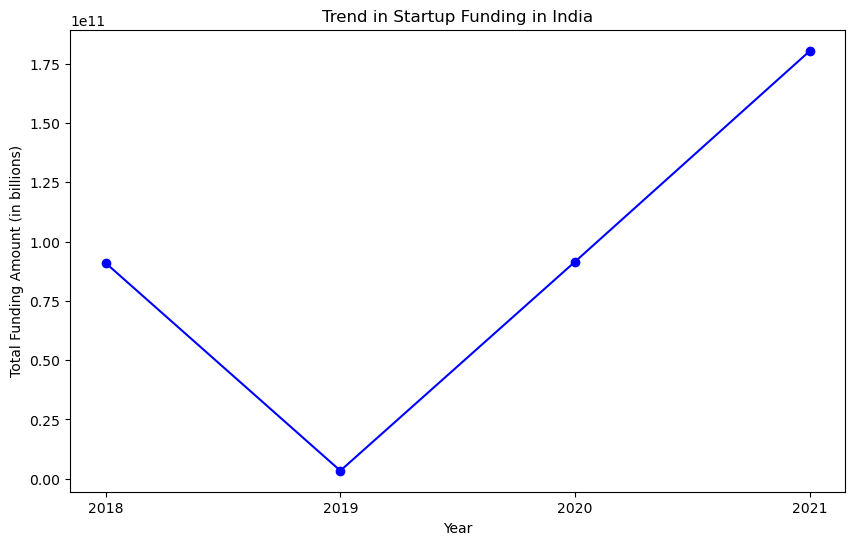

In [109]:
# Plotting a line graph to show the startup funding trends in India across the years (2018-2021)
# Filter the df_combined to include only the desired years

desired_years = [2018, 2019, 2020, 2021]
filtered_df = df_combined[df_combined['Year'].isin(desired_years)]

# Group the filtered data by year and calculate the total funding amount for each year
funding_by_year = filtered_df.groupby('Year')['Amount'].sum()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(funding_by_year.index, funding_by_year.values, marker='o', color='blue')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Total Funding Amount (in billions)')
plt.title('Trend in Startup Funding in India')

# Set the x-axis ticks to only display the desired years
plt.xticks(funding_by_year.index)

# Display the plot
plt.show()

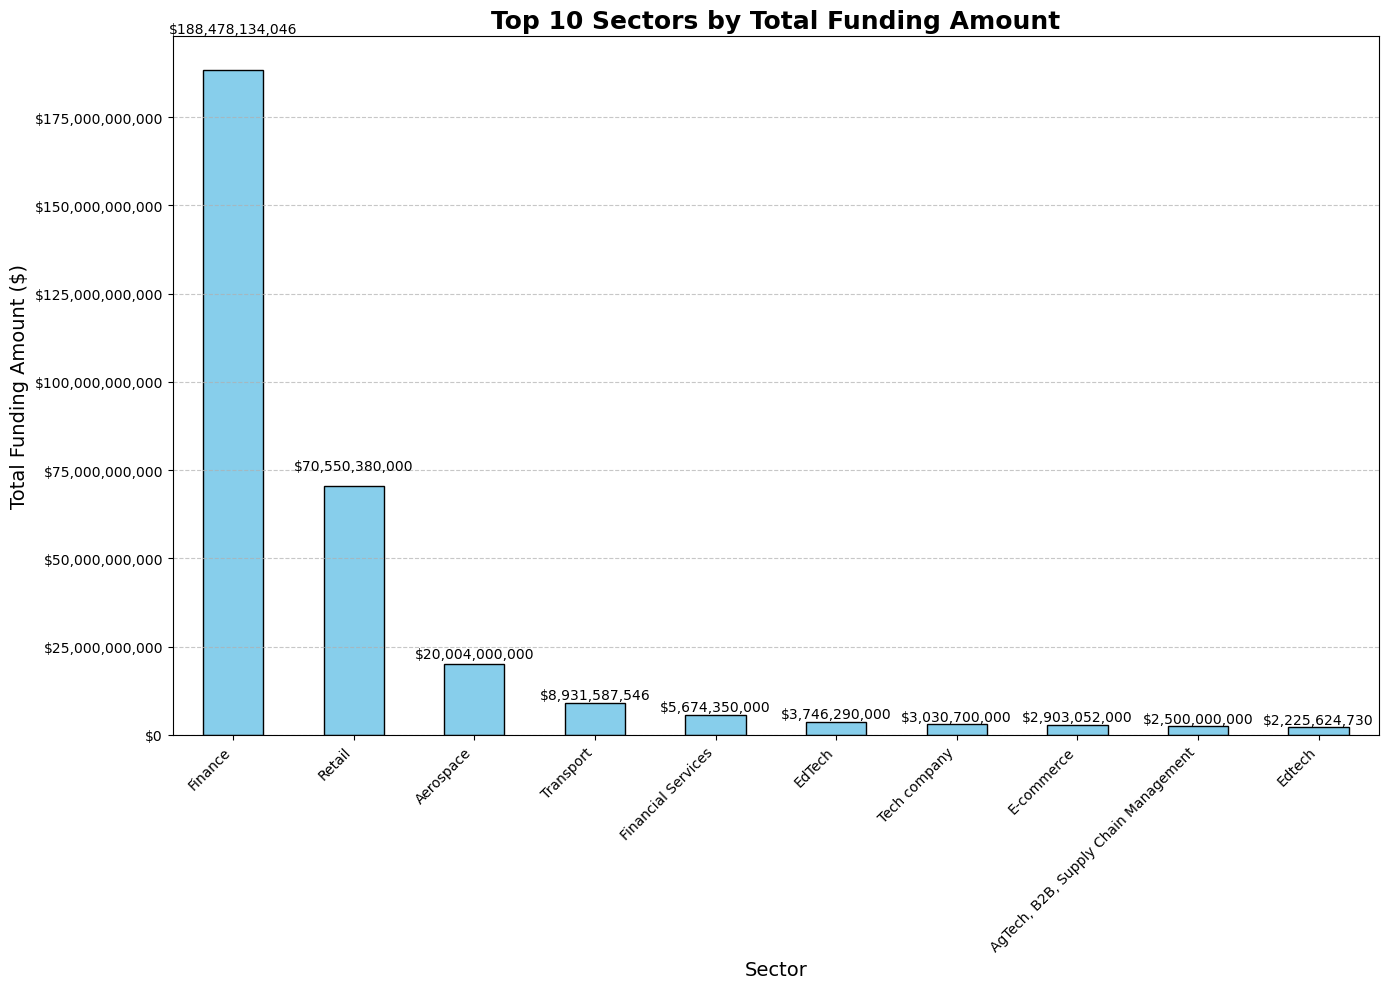

In [110]:
# Assuming df_combined is already loaded and 'Amount' column is numeric
df_combined['Amount'] = pd.to_numeric(df_combined['Amount'], errors='coerce')
 
# Group by sector and sum the funding amounts
sector_funding = df_combined.groupby('Sector')['Amount'].sum().sort_values(ascending=False)
 
# Get the top 10 sectors by funding amount
top_10_sectors = sector_funding.head(10)
 
# Visualization - Bar Chart
plt.figure(figsize=(14, 10))  # Increased figure size for better visibility
bars = top_10_sectors.plot(kind='bar', color='skyblue', edgecolor='black')
 
# Adding data labels to the bars
for index, value in enumerate(top_10_sectors):
    plt.text(index, value + (0.05 * value), f'${value:,.0f}', ha='center', va='bottom', fontsize=10, color='black')
 

# Titles and labels
plt.title('Top 10 Sectors by Total Funding Amount', fontsize=18, fontweight='bold')
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Total Funding Amount ($)', fontsize=14)
plt.xticks(rotation=45, ha='right')
 
# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
 
# Formatting y-axis labels for better readability
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
 
# Show plot
plt.tight_layout()
plt.show()

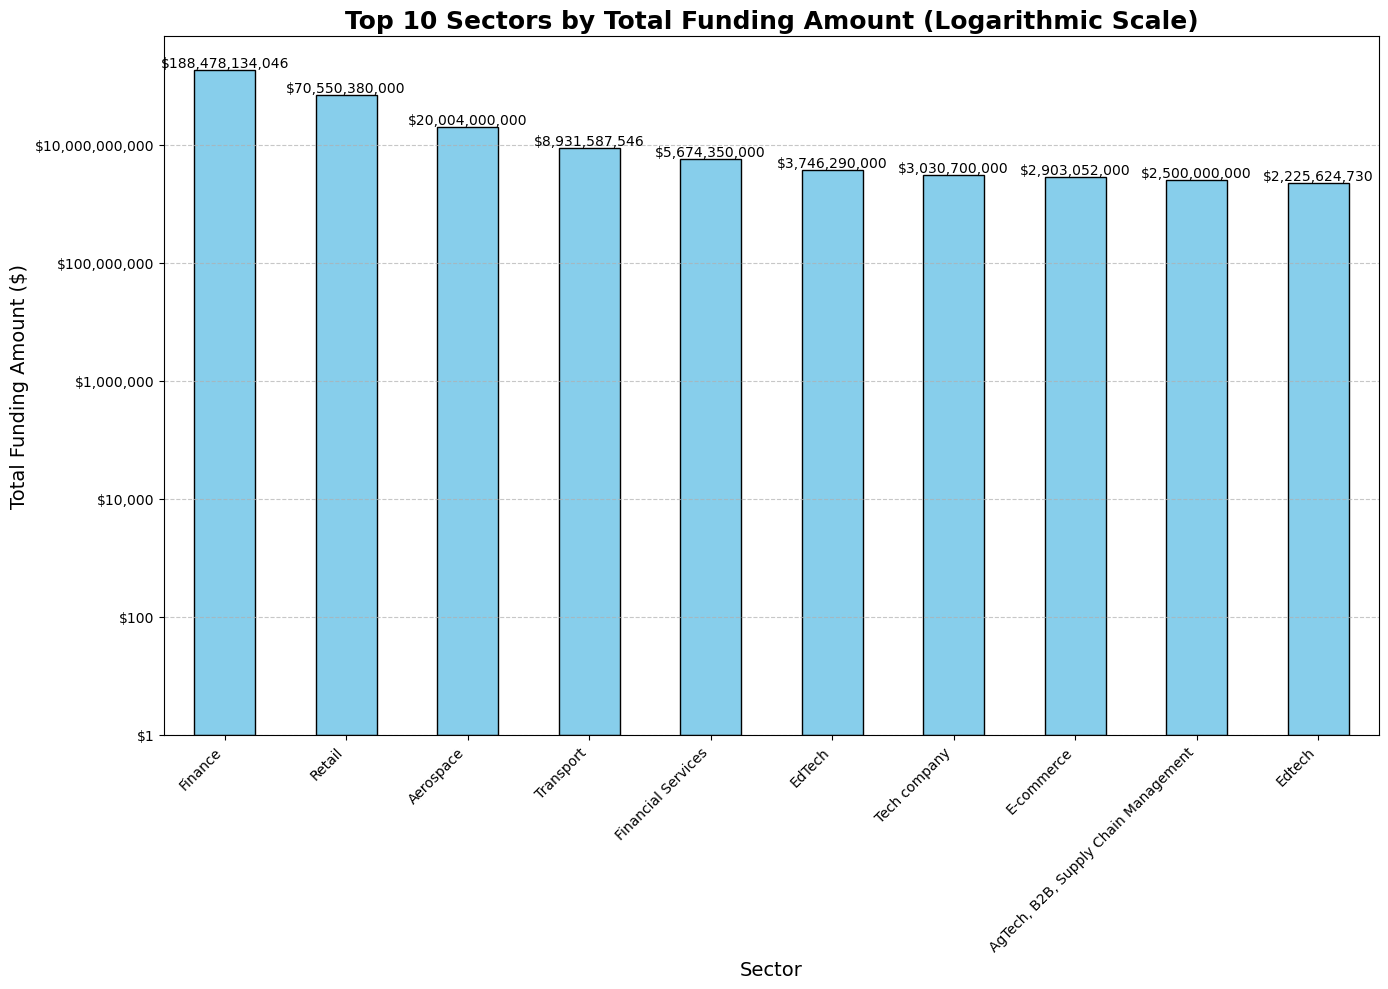

In [111]:
# Assuming df_combined is already loaded and 'Amount' column is numeric
df_combined['Amount'] = pd.to_numeric(df_combined['Amount'], errors='coerce')
 
# Group by sector and sum the funding amounts
sector_funding = df_combined.groupby('Sector')['Amount'].sum().sort_values(ascending=False)
 
# Get the top 10 sectors by funding amount
top_10_sectors = sector_funding.head(10)
 
# Visualization - Bar Chart with Logarithmic Scale
plt.figure(figsize=(14, 10))
bars = top_10_sectors.plot(kind='bar', color='skyblue', edgecolor='black', log=True)
 
# Adding data labels to the bars
for index, value in enumerate(top_10_sectors):
    plt.text(index, value, f'${value:,.0f}', ha='center', va='bottom', fontsize=10, color='black')
 

# Titles and labels
plt.title('Top 10 Sectors by Total Funding Amount (Logarithmic Scale)', fontsize=18, fontweight='bold')
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Total Funding Amount ($)', fontsize=14)
plt.xticks(rotation=45, ha='right')
 
# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
 
# Formatting y-axis labels for better readability
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
 
# Show plot
plt.tight_layout()
plt.show()

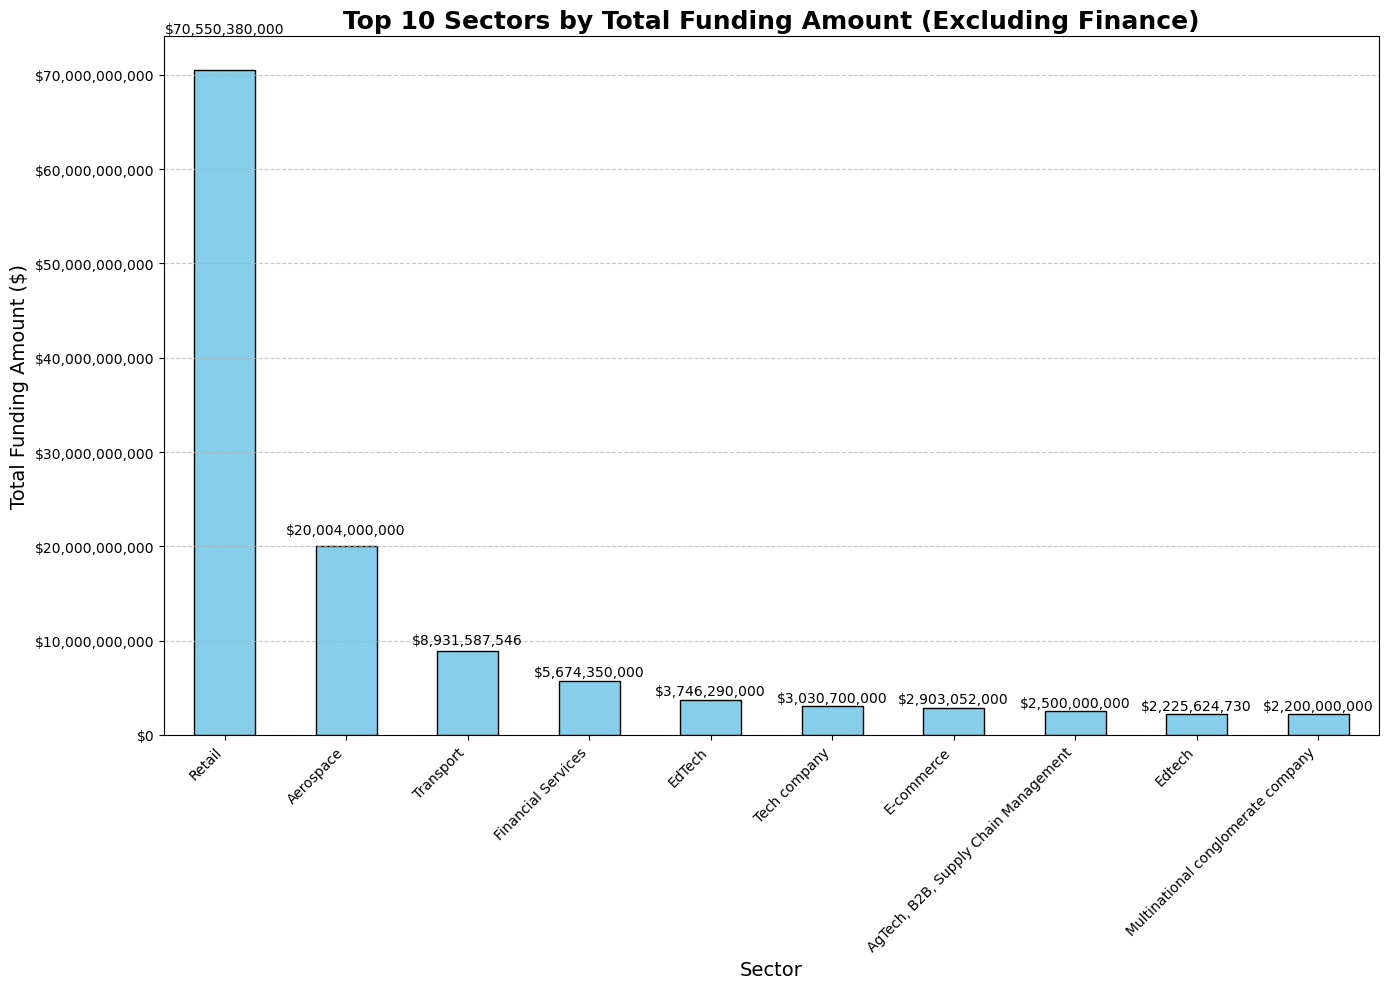

In [112]:
# Assuming df_combined is already loaded and 'Amount' column is numeric
df_combined['Amount'] = pd.to_numeric(df_combined['Amount'], errors='coerce')
 
# Group by sector and sum the funding amounts
sector_funding = df_combined.groupby('Sector')['Amount'].sum().sort_values(ascending=False)
 
# Exclude the 'Finance' sector
sector_funding_no_finance = sector_funding.drop(labels='Finance')
 
# Get the top 10 sectors by funding amount excluding 'Finance'
top_10_sectors_no_finance = sector_funding_no_finance.head(10)
 
# Visualization - Bar Chart
plt.figure(figsize=(14, 10))
bars = top_10_sectors_no_finance.plot(kind='bar', color='skyblue', edgecolor='black')
 
# Adding data labels to the bars
for index, value in enumerate(top_10_sectors_no_finance):
    plt.text(index, value + (0.05 * value), f'${value:,.0f}', ha='center', va='bottom', fontsize=10, color='black')
 

 
# Titles and labels
plt.title('Top 10 Sectors by Total Funding Amount (Excluding Finance)', fontsize=18, fontweight='bold')
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Total Funding Amount ($)', fontsize=14)
plt.xticks(rotation=45, ha='right')
 
# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
 
# Formatting y-axis labels for better readability
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
 
# Show plot
plt.tight_layout()
plt.show()

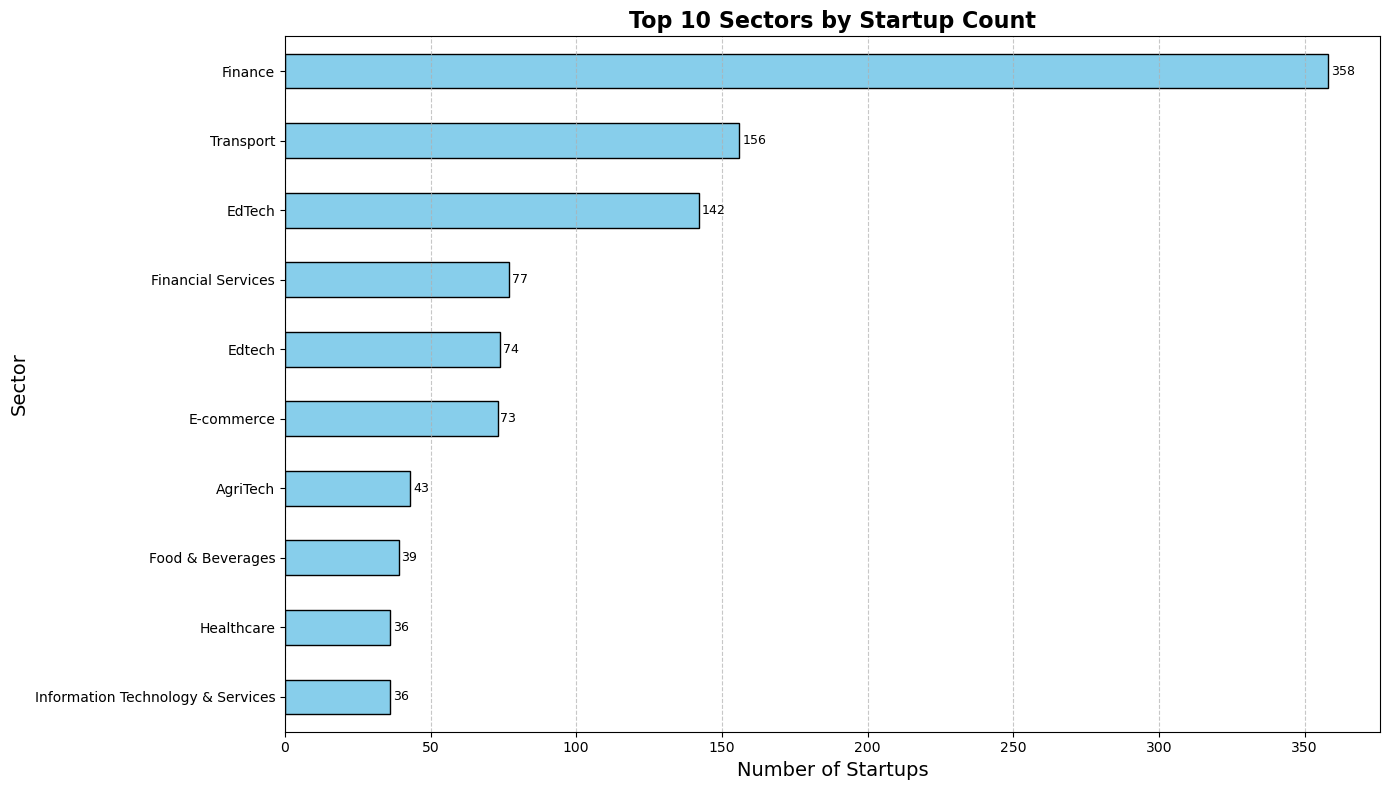

In [113]:
# Group by sector and count the number of startups
sector_startup_count = df_combined['Sector'].value_counts().head(10).sort_values(ascending=True)
 
# Visualization - Horizontal Bar Chart
plt.figure(figsize=(14, 8))
bars = sector_startup_count.plot(kind='barh', color='skyblue', edgecolor='black')
 
# Adding data labels to the bars
for index, value in enumerate(sector_startup_count):
    plt.text(value + 1, index, f'{value}', va='center', ha='left', fontsize=9, color='black')
 

# Titles and labels
plt.title('Top 10 Sectors by Startup Count', fontsize=16, fontweight='bold')
plt.xlabel('Number of Startups', fontsize=14)
plt.ylabel('Sector', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
 

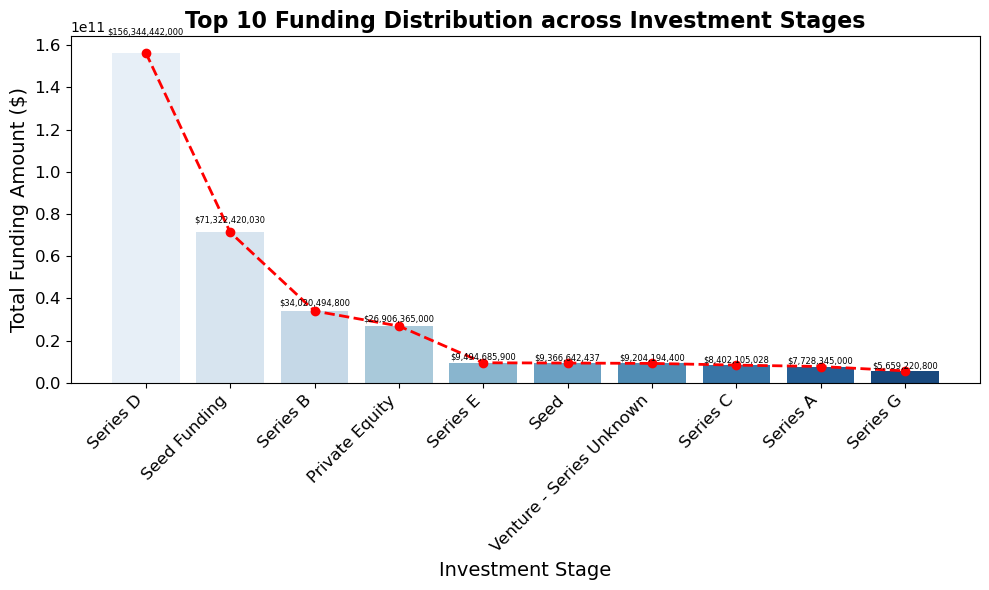

In [114]:
# Assuming df_combined is already loaded
# Calculate the total funding amount for each stage
stage_funding = df_combined.groupby('Stage')['Amount'].sum().sort_values(ascending=False)
 
# Get the top 10 stages by total funding amount
top_stages = stage_funding.head(10)
 
# Create a bar plot for the top 10 stages
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=top_stages.index, y=top_stages.values, palette='Blues')
 
# Adding data labels to the bars
for index, value in enumerate(top_stages.values):
    plt.text(index, value + (0.05 * value), f'${value:,.0f}', ha='center', va='bottom', fontsize=6, color='black')
 
# Add a line from highest to lowest
plt.plot(range(len(top_stages)), top_stages.values, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=6)
 
# Titles and labels
plt.title('Top 10 Funding Distribution across Investment Stages', fontsize=16, fontweight='bold')
plt.xlabel('Investment Stage', fontsize=14)
plt.ylabel('Total Funding Amount ($)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
 

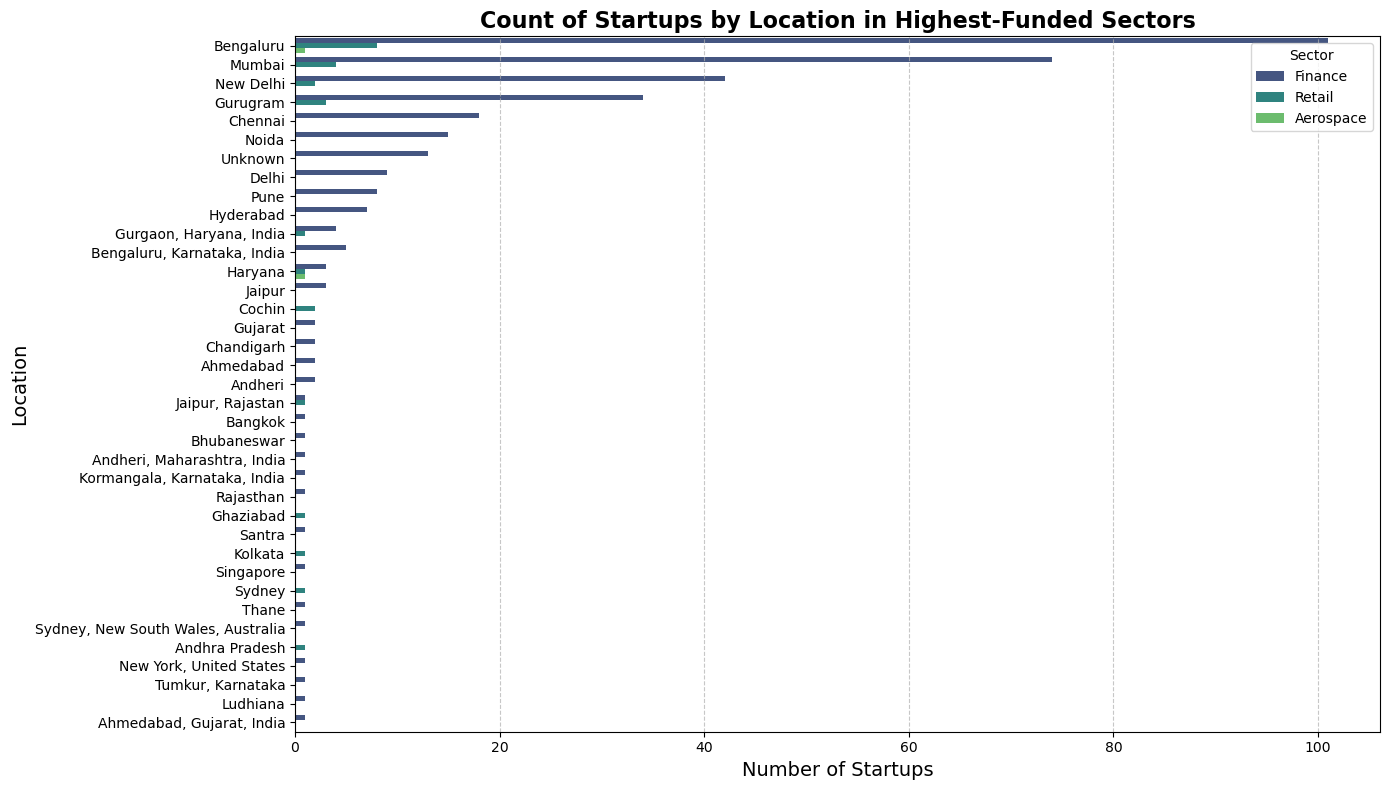

In [115]:
# Get the top 3 highest-funded sectors
top_sectors = top_10_sectors.index[:3]
 
# Filter dataset for these sectors
top_sectors_df = df_combined[df_combined['Sector'].isin(top_sectors)]
 
# Visualization - Count of Startups by Location in Highest-Funded Sectors
plt.figure(figsize=(14, 8))
sns.countplot(data=top_sectors_df, y='HeadQuarter', hue='Sector', palette='viridis', order=top_sectors_df['HeadQuarter'].value_counts().index)
plt.title('Count of Startups by Location in Highest-Funded Sectors', fontsize=16, fontweight='bold')
plt.xlabel('Number of Startups', fontsize=14)
plt.ylabel('Location', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [116]:
# Do a count of the values for each headquarter in the merged_df
top_10_cities =df_combined['HeadQuarter'].value_counts().head()
top_10_cities

HeadQuarter
Bengaluru    868
Mumbai       474
Gurugram     268
New Delhi    232
Unknown      114
Name: count, dtype: int64

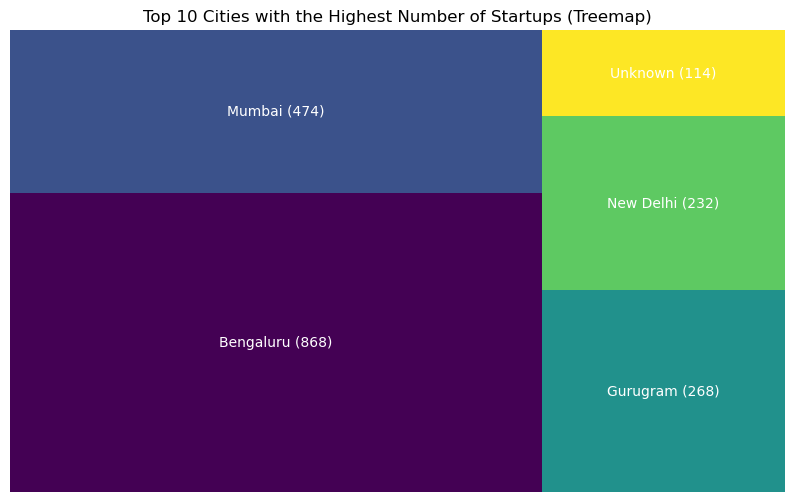

In [117]:
# Plotting a treemap showing the top 5 cities with the highest number of startups in the Indian startup ecosystem.
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_cities)))
squarify.plot(sizes=top_10_cities.values, label=[f'{c} ({v})' for c, v in zip(top_10_cities.index, top_10_cities.values)], color=colors, text_kwargs={'color': 'white'})
plt.axis('off')
plt.title('Top 10 Cities with the Highest Number of Startups (Treemap)')
plt.show()